In [1]:
# Para conocer el enunciado del problema, consultar el libro:
# Metodos Numericos Aplicados a la Ingeniería: Casos de estudio utilizando MATLAB (2014)
# por Héctor Jorquera y Claudio Gelmi
# 
# Código Python escrito por Claudio Gelmi, Ph.D.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Constantes y valores
R = 1.987  # cal/gmol*K
k_exp = np.array([0.0014, 0.0026, 0.0047, 0.0083, 0.014, 0.023, 0.038, 0.059, 0.09])
T = np.arange(300, 381, 10)
invT = 1.0/T
y = np.log(k_exp)

# Primera estrategia: regresión de orden 1 (ln(k) = A + B * (1/T))
coef = np.polyfit(invT, y, 1)

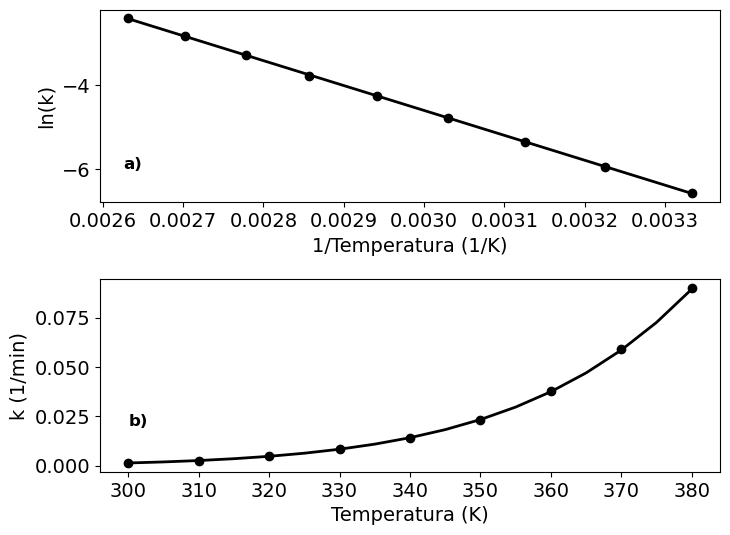

In [4]:
# Comparación gráfica entre modelo y datos experimentales (error)
plt.figure(figsize=(8,6))

plt.subplot(2, 1, 1)
plt.plot(invT, y, 'ko', invT, np.polyval(coef, invT), 'k', lw=2)
plt.xlabel('1/Temperatura (1/K)', fontsize=14)
plt.ylabel('ln(k)', fontsize=14)
plt.text(0.002625,-6,"a)",fontsize=12, fontweight='bold')
plt.subplots_adjust(hspace=0.4)  # Aumenta el espacio vertical entre figuras
plt.tick_params(axis='both', labelsize=14)

plt.subplot(2, 1, 2)
T1 = np.arange(300, 381, 5)
k_model = np.exp(coef[1])*np.exp(coef[0]/T1)
plt.plot(T, k_exp, 'ko', T1, k_model, 'k', linewidth=2)
plt.xlabel('Temperatura (K)', fontsize=14)
plt.ylabel('k (1/min)', fontsize=14)
plt.text(300,0.02,"b)",fontsize=12, fontweight='bold')
plt.tick_params(axis='both', labelsize=14)
plt.show()

In [5]:
# Resultados numéricos
A = np.exp(coef[1])
E = -coef[0]*R
print('- Ajuste lineal (polyfit):')
print(f'A = {round(A,1)} 1/min')
print(f'E = {round(E,1)} cal/gmol')

# Cálculo del error cuadrático entre modelo y datos
k_model = A*np.exp(coef[0]*invT)
error = np.sum((k_exp - k_model)**2)
print(f'Error (SSE) = {round(error,9)}')

# Segunda estrategia: ajuste no lineal mediante mínimos cuadrados (curve_fit)
print('\n- Ajuste no lineal (curve_fit):')

# Modelo
def modelo(xdata, A, E_R):
    return A*np.exp(-E_R/(R*xdata))

# Valores iniciales y ejecución de la función
initial_guess = [500000, 1e4]
params, pcov,_,mesg,_ = curve_fit(modelo, xdata=T, ydata=k_exp, p0=initial_guess, full_output=True)
print("Mensaje de convergencia:", mesg)

# Cálculo del error cuadrático entre modelo y datos (sse)
model_predictions = modelo(T, *params)
sse = np.sum((k_exp - model_predictions)**2)

print(f'A = {round(params[0],1)} 1/min \nE = {round(params[1],1)} cal/gmol')
print("Error (SSE) =", round(sse,9))

- Ajuste lineal (polyfit):
A = 565797.7 1/min
E = 11824.2 cal/gmol
Error (SSE) = 9.03e-07

- Ajuste no lineal (curve_fit):
Mensaje de convergencia: Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
A = 615364.7 1/min 
E = 11882.1 cal/gmol
Error (SSE) = 3.65e-07
